# --- Step 1: Load the Dataset ---

In [ ]:
import pandas as pd

# The 'r' before the string is important; it tells Python to treat backslashes as literal characters.
file_path = r'C:\Users\SALEEM\KSA Project\CMAPSSData\train_FD001.txt'

# --- Step 1: Load the Dataset ---

    # Load the data from the full path
    private_df = pd.read_csv(file_path, sep='\\s+', header=None)
    
    print("--- Successfully loaded the private dataset ---")
    print(f"Loaded from: {file_path}")
    
    print("\nDisplaying the first 5 rows with generic column names:")
    print(private_df.head())
    
    print("\n\n--- Initial Data Inspection (.info()) ---")
    print("Getting basic information (number of rows, columns, and data types):")
    # .info() is a great first command to run on any new dataset.
    private_df.info()

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path.")
    print(f"Please double-check that this path is correct: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


--- Successfully loaded the private dataset ---
Loaded from: C:\Users\SALEEM\KSA Project\CMAPSSData\train_FD001.txt

Displaying the first 5 rows with generic column names:
   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0 

# --- Step 2: Exploratory Data Analysis (EDA) ---

In [ ]:
import pandas as pd


# --- Step 2: Exploratory Data Analysis (EDA) ---

# 1. Get Summary Statistics for all columns
# .describe() provides a statistical overview of each numerical column.
print("--- 1. Summary Statistics (.describe()) ---")
print("This shows the count, mean, standard deviation, min/max, and quartiles for each column.")
print(df.describe())


# 2. Identify likely ID and Time-Cycle columns
# We suspect Column 0 is the unit ID and Column 1 is the time cycle.
# Let's verify this by counting their unique values.
print("\n\n--- 2. Investigating Potential ID and Time Columns ---")

num_units = df[0].nunique()
print(f"Number of unique values in Column 0 (likely Unit ID): {num_units}")
print("This suggests we have data from 100 different units.")

# Check if Column 1 is a simple counter for each unit
# We can do this by seeing the max value of column 1 for each value in column 0
print("\nMaximum value of Column 1 for each unit in Column 0:")
print(df.groupby(0)[1].max())


# 3. Check for columns with no variation
# Some sensors or settings might be constant and therefore not useful for prediction.
print("\n\n--- 3. Checking for Columns with No Variation ---")
# We calculate the standard deviation for each column. A value of 0 means no variation.
constant_columns = df.columns[df.std() == 0]
if len(constant_columns) > 0:
    print(f"The following columns have zero standard deviation (they are constant): {list(constant_columns)}")
    print("These columns are not useful for prediction and can be removed later.")
else:
    print("No columns with zero standard deviation found.")


--- Dataset loaded successfully ---

--- 1. Summary Statistics (.describe()) ---
This shows the count, mean, standard deviation, min/max, and quartiles for each column.
                 0             1             2             3        4   \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

                 5             6             7             8             9   \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean  

# --- Step 3: Preprocessing and Cleaning ---

In [5]:
import pandas as pd


# --- Step 3: Preprocessing and Cleaning ---
print("\\n--- Starting Preprocessing ---")

# Step 3.1: Drop columns by index. This is unambiguous.
columns_to_drop = [4, 22, 23] 
df.drop(columns=columns_to_drop, inplace=True)
print(f"\\n1. Dropped constant columns by index: {columns_to_drop}")

# Step 3.2: Define names for the remaining 23 columns. This is now safe.
final_names = [
    'unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2',
    's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
    's11', 's12', 's13', 's14', 's15', 's16', 's17', 's20', 's21'
]
df.columns = final_names
print("\\n2. Assigned meaningful column names.")

# --- Verification ---
print("\\n--- Verifying Preprocessing ---")
print("\\nNew DataFrame structure (.info()):")
df.info()

print("\\nFirst 5 rows of the cleaned and preprocessed data:")
print(df.head())


\n--- Starting Preprocessing ---
\n1. Dropped constant columns by index: [4, 22, 23]
\n2. Assigned meaningful column names.
\n--- Verifying Preprocessing ---
\nNew DataFrame structure (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   s1              20631 non-null  float64
 5   s2              20631 non-null  float64
 6   s3              20631 non-null  float64
 7   s4              20631 non-null  float64
 8   s5              20631 non-null  float64
 9   s6              20631 non-null  float64
 10  s7              20631 non-null  float64
 11  s8              20631 non-null  float64
 12  s9              20631 non-null  float64
 13  s10             

# --- Step 4: Feature Engineering - Calculate RUL ---

\n--- Starting Feature Engineering ---
\n1. Calculated the Remaining Useful Life (RUL) for each row.
\n--- Verifying Feature Engineering ---
\nFirst 5 rows of the data with the new 'RUL' column:
   unit_number  time_in_cycles  op_setting_1  op_setting_2      s1      s2  \
0            1               1       -0.0007       -0.0004  518.67  641.82   
1            1               2        0.0019       -0.0003  518.67  642.15   
2            1               3       -0.0043        0.0003  518.67  642.35   
3            1               4        0.0007        0.0000  518.67  642.35   
4            1               5       -0.0019       -0.0002  518.67  642.37   

        s3       s4     s5     s6  ...    s11     s12      s13      s14  \
0  1589.70  1400.60  14.62  21.61  ...  47.47  521.66  2388.02  8138.62   
1  1591.82  1403.14  14.62  21.61  ...  47.49  522.28  2388.07  8131.49   
2  1587.99  1404.20  14.62  21.61  ...  47.27  522.42  2388.03  8133.23   
3  1582.79  1401.87  14.62  21.61  .

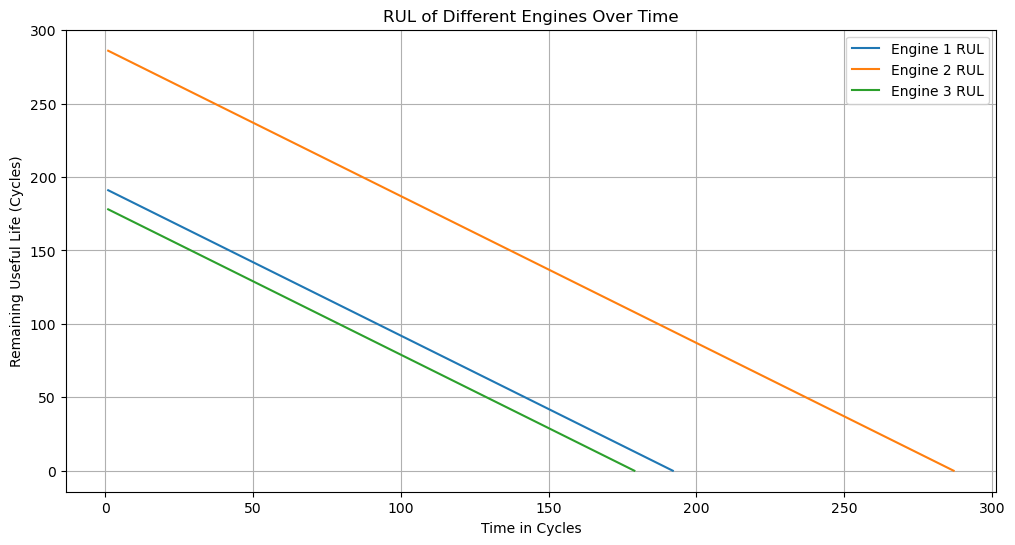

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



# --- Step 4: Feature Engineering - Calculate RUL ---
print("\\n--- Starting Feature Engineering ---")

# 1. Find the maximum cycle for each engine unit
# This gives us the point of failure for each engine.
max_cycles = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles.columns = ['unit_number', 'failure_cycle']

# 2. Merge this information back into the main dataframe
df = pd.merge(df, max_cycles, on='unit_number', how='left')

# 3. Calculate the RUL for each data point
df['RUL'] = df['failure_cycle'] - df['time_in_cycles']

# 4. Drop the helper column 'failure_cycle'
df.drop(columns=['failure_cycle'], inplace=True)

print("\\n1. Calculated the Remaining Useful Life (RUL) for each row.")

# --- Verification ---
print("\\n--- Verifying Feature Engineering ---")
print("\\nFirst 5 rows of the data with the new 'RUL' column:")
print(df.head())

print("\\nLast 5 rows for Engine 1 (to see RUL decrease to 0):")
print(df[df['unit_number'] == 1].tail())

# --- Visualization of RUL ---
print("\\n--- Visualizing RUL ---")
plt.figure(figsize=(12, 6))

# Plot RUL for a few engines to see the trend
plt.plot(df[df['unit_number'] == 1]['time_in_cycles'], df[df['unit_number'] == 1]['RUL'], label='Engine 1 RUL')
plt.plot(df[df['unit_number'] == 2]['time_in_cycles'], df[df['unit_number'] == 2]['RUL'], label='Engine 2 RUL')
plt.plot(df[df['unit_number'] == 3]['time_in_cycles'], df[df['unit_number'] == 3]['RUL'], label='Engine 3 RUL')

plt.title('RUL of Different Engines Over Time')
plt.xlabel('Time in Cycles')
plt.ylabel('Remaining Useful Life (Cycles)')
plt.legend()
plt.grid(True)
plt.savefig('RUL_per_engine.png')
print("\\nGenerated a plot and saved it as: RUL_per_engine.png")


# --- Load and Preprocess Data (Steps 1-4) ---

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# The exact file path you provided.
file_path = r'C:\\Users\\SALEEM\\KSA Project\\CMAPSSData\\train_FD001.txt'

# --- Load and Preprocess Data (Steps 1-4) ---
try:
    df = pd.read_csv(file_path, sep='\\s+', header=None)
    columns_to_drop = [4, 22, 23] 
    df.drop(columns=columns_to_drop, inplace=True)
    final_names = [
        'unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2',
        's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
        's11', 's12', 's13', 's14', 's15', 's16', 's17', 's20', 's21'
    ]
    df.columns = final_names
    
    max_cycles = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
    max_cycles.columns = ['unit_number', 'failure_cycle']
    df = pd.merge(df, max_cycles, on='unit_number', how='left')
    df['RUL'] = df['failure_cycle'] - df['time_in_cycles']
    df.drop(columns=['failure_cycle'], inplace=True)
    print("--- Data loaded and prepared successfully ---")

except Exception as e:
    print(f"An error occurred during loading/preparation: {e}")
    exit()

# --- Step 5: Scale the Data ---
print("\\n--- Scaling Feature Data ---")

features_to_scale = ['op_setting_1', 'op_setting_2', 's1', 's2', 's3', 's4', 
                     's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 
                     's14', 's15', 's16', 's17', 's20', 's21']
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print("\\n1. Applied Min-Max scaling to all operational settings and sensor readings.")

# --- Verification ---
print("\\n--- Verifying Scaling ---")
print("\\nFirst 5 rows of the final, scaled data:")
print(df.head())

# --- Save the Final Data to Your Specified Path ---
output_path = r'C:\\Users\\SALEEM\\KSA Project\\preprocessed_train_data.csv'
try:
    df.to_csv(output_path, index=False)
    print("\\n\\n--- Final Processed Data Saved ---")
    print(f"Successfully saved the fully preprocessed data to: {output_path}")
except Exception as e:
    print(f"\\n\\n--- ERROR SAVING FILE ---")
    print(f"Could not save the file to '{output_path}'")
    print(f"Please ensure the directory exists and you have permission to write there.")
    print(f"Error details: {e}")


--- Data loaded and prepared successfully ---
\n--- Scaling Feature Data ---
\n1. Applied Min-Max scaling to all operational settings and sensor readings.
\n--- Verifying Scaling ---
\nFirst 5 rows of the final, scaled data:
   unit_number  time_in_cycles  op_setting_1  op_setting_2   s1        s2  \
0            1               1      0.459770      0.166667  0.0  0.183735   
1            1               2      0.609195      0.250000  0.0  0.283133   
2            1               3      0.252874      0.750000  0.0  0.343373   
3            1               4      0.540230      0.500000  0.0  0.343373   
4            1               5      0.390805      0.333333  0.0  0.349398   

         s3        s4   s5   s6  ...       s11       s12       s13       s14  \
0  0.406802  0.309757  0.0  1.0  ...  0.369048  0.633262  0.205882  0.199608   
1  0.453019  0.352633  0.0  1.0  ...  0.380952  0.765458  0.279412  0.162813   
2  0.369523  0.370527  0.0  1.0  ...  0.250000  0.795309  0.220588  0.17

# --- Step 6: Create Sequences for LSTM Model ---

In [15]:
import pandas as pd
import numpy as np

# --- Load the Fully Preprocessed Data ---
# This is the file we saved at the end of the last step.
processed_data_path = r'C:\\Users\\SALEEM\\KSA Project\\preprocessed_train_data.csv'
try:
    df = pd.read_csv(processed_data_path)
    print("--- Successfully loaded preprocessed data ---")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- Step 6: Create Sequences for LSTM Model ---
print("\\n--- Restructuring data into sequences for LSTM ---")

# We will use the sensor and operational settings as our features.
# RUL is our target, and the other two are identifiers.
features = ['op_setting_1', 'op_setting_2', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 
            's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 
            's20', 's21']
target = 'RUL'

# Define the sequence length (or "window size").
# This means we'll look at the last 50 cycles to predict the RUL of the 50th cycle.
sequence_length = 50

# We will store our final sequences and labels here
X_sequences = []
y_labels = []

# We need to do this for each engine unit separately.
for unit in df['unit_number'].unique():
    # Get the data for the current engine unit
    unit_df = df[df['unit_number'] == unit]
    
    # Create sequences for the current unit
    # We slide a window of size 'sequence_length' over the data.
    for i in range(len(unit_df) - sequence_length):
        # The sequence of features (our X)
        seq = unit_df[features].iloc[i:i+sequence_length].values
        X_sequences.append(seq)
        
        # The label (our y) is the RUL at the end of the sequence
        label = unit_df[target].iloc[i+sequence_length-1]
        y_labels.append(label)

# Convert the lists to NumPy arrays, which is the required format for TensorFlow/Keras
X_train = np.array(X_sequences)
y_train = np.array(y_labels)

print(f"\\n1. Created {len(X_train)} sequences of length {sequence_length}.")


# --- Verification ---
print("\\n--- Verifying Sequence Shapes ---")
# The shape of X_train should be (number_of_sequences, sequence_length, number_of_features)
print(f"Shape of X_train (feature sequences): {X_train.shape}")

# The shape of y_train should be (number_of_sequences,)
print(f"Shape of y_train (labels): {y_train.shape}")

# --- Save Final Data for Modeling ---
# We save these as NumPy arrays for easy loading in the next script.
np.save(r'C:\\Users\\SALEEM\\KSA Project\\X_train.npy', X_train)
np.save(r'C:\\Users\\SALEEM\\KSA Project\\y_train.npy', y_train)

print("\\n\\n--- Final Data for Modeling Saved ---")
print("Saved X_train.npy and y_train.npy to your project folder.")
print("We are now ready to build and train the LSTM model!")


--- Successfully loaded preprocessed data ---
\n--- Restructuring data into sequences for LSTM ---
\n1. Created 15631 sequences of length 50.
\n--- Verifying Sequence Shapes ---
Shape of X_train (feature sequences): (15631, 50, 21)
Shape of y_train (labels): (15631,)
\n\n--- Final Data for Modeling Saved ---
Saved X_train.npy and y_train.npy to your project folder.
We are now ready to build and train the LSTM model!


# --- Load the Final Training Data ---

In [18]:
import numpy as np
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- Load the Final Training Data ---
X_train_path = r'C:\\Users\\SALEEM\\KSA Project\\X_train.npy'
y_train_path = r'C:\\Users\\SALEEM\\KSA Project\\y_train.npy'

try:
    X_train = np.load(X_train_path)
    y_train = np.load(y_train_path)
    print("--- Successfully loaded training data for modeling ---")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")

except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- Step 7: Build and Train the LSTM Model ---
print("\\n--- Building the LSTM Model ---")

# We use a Sequential model, which lets us add layers one by one.
model = Sequential()

# Input Layer: LSTM
# The input_shape is (sequence_length, number_of_features)
# return_sequences=True is important when stacking LSTM layers.
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2)) # Dropout helps prevent overfitting

# Hidden Layer: LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output Layer: Dense
# This is a standard, fully-connected layer. '1' means it outputs a single value (our RUL).
model.add(Dense(units=1))

# Compile the model
# We define how the model will learn.
# 'adam' is a good general-purpose optimizer.
# 'mean_squared_error' is the loss function for regression problems like ours.
model.compile(optimizer='adam', loss='mean_squared_error')

# Print a summary of the model's architecture
print("\\nModel Architecture:")
model.summary()


print("\\n--- Starting Model Training ---")
# This is where the model learns from the data.
# epochs=10 means the model will see the entire dataset 10 times.
# batch_size=64 means the model will update its weights after seeing 64 samples.
# validation_split=0.2 means we'll use 20% of the data to check the model's performance as it trains.
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

print("\\n--- Model Training Complete ---")


# --- Save the Trained Model ---
model_save_path = r'C:\\Users\\SALEEM\\KSA Project\\lstm_rul_predictor.h5'
model.save(model_save_path)

print(f"\\nSuccessfully saved the trained model to: {model_save_path}")


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 1.4 MB/s eta 0:04:30
   ---------------------------------------- 0.8/376.0 MB 1.5 MB/s eta 0:04:07
   ---------------------------------------- 1.3/376.0 MB 1.7 MB/s eta 0:03:38
   ---------------------------------------- 1.6/376.0 MB 1.7 MB/s eta 0:03:35
   ---------------------------------------- 2.4/376.0 MB 2.1 MB/s eta 0:03:01
   ---------------------------------------- 2.9/376.0 MB 2.2 MB/s eta 0:02:52
   ---------------------------------------- 3.7/376.0 MB 2.3 MB/s eta 0:02:43
   ---------------------------------------- 4.2/376.0 MB 2.4 MB/s eta 0:02:36
    --------------------------------------- 5.0/376.0 MB 2.5 MB/s eta 0:02:29
    --------------------------------------- 5.5/376.0 MB 2.5 MB/s eta 0:02:26
    --------------------------------------- 6.0/376.0 MB 2.5 MB/s eta 0:02:26


c:\Users\SALEEM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


\nModel Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 100)        │        48,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,051 (308.79 KB)

 Trainable params: 79,051 (308.79 KB)

 Non-trainable params: 0 (0.00 B)

\n--- Starting Model Training ---
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - loss: 8480.9775 - val_loss: 10944.5166
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 6859.6196 - val_loss: 9559.2373
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 5842.6006 - val_loss: 8453.9746
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 4861.2739 - val_loss: 7567.7578
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - loss: 4380.5688 - val_loss: 6861.3374
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 4045.1777 - val_loss: 6304.8589
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 3607.3582 - val_loss: 5873.0356
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - loss: 3344.8293 - val_loss: 5546.3057
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - loss: 3191.5234 - val_loss: 5299.6523
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - loss: 3060.2754 - val_loss: 5122.5381


\n--- Model Training Complete ---
\nSuccessfully saved the trained model to: C:\\Users\\SALEEM\\KSA Project\\lstm_rul_predictor.h5


# --- PREPARE THE TEST DATA ---

--- Successfully loaded trained model ---
\n--- Scaler fitted on original training data ---
--- Test data loaded and preprocessed ---
\n--- Created 100 test sequences (with padding for short ones) ---
Shape of X_test: (100, 50, 21)
\n--- Making predictions on the test set ---
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step
\n--- Evaluating Model Performance ---
Mean Squared Error (MSE): 1736.74
Root Mean Squared Error (RMSE): 41.67
\n(RMSE is the average error in cycles. A lower value is better.)
\n--- Generated final evaluation plot: final_evaluation_padded.png ---


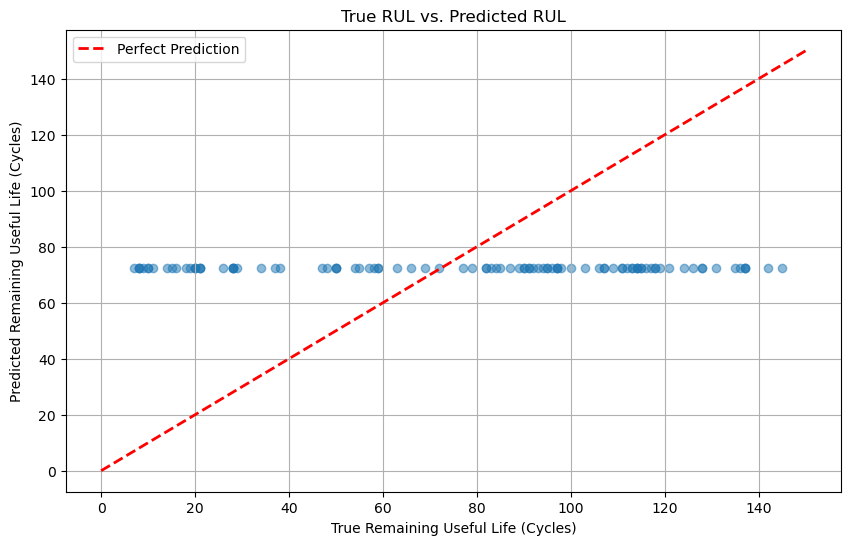

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# --- File Paths ---
# Path to the original training data (needed for fitting the scaler)
train_path = r'C:\\Users\\SALEEM\\KSA Project\\CMAPSSData\\train_FD001.txt'
# Path to the test data
test_path = r'C:\\Users\\SALEEM\\KSA Project\\CMAPSSData\\test_FD001.txt'
# Path to the ground truth RUL values for the test set
rul_path = r'C:\\Users\\SALEEM\\KSA Project\\CMAPSSData\\RUL_FD001.txt'
# Path to our saved model
model_path = r'C:\\Users\\SALEEM\\KSA Project\\lstm_rul_predictor.h5'

# --- Load the Trained Model ---
try:
    model = load_model(model_path)
    print("--- Successfully loaded trained model ---")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()


# --- PREPARE THE TEST DATA ---
# We must apply the *exact same* preprocessing to the test data.

# 1. Define column names and columns to drop (from our EDA)
final_names = [
    'unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2',
    's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
    's11', 's12', 's13', 's14', 's15', 's16', 's17', 's20', 's21'
]
features_to_scale = ['op_setting_1', 'op_setting_2', 's1', 's2', 's3', 's4', 
                     's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 
                     's14', 's15', 's16', 's17', 's20', 's21']
columns_to_drop = [4, 22, 23]

# 2. Fit a scaler on the ORIGINAL TRAINING DATA
# This is crucial. We must scale the test data using the range of the training data.
train_df = pd.read_csv(train_path, sep='\\s+', header=None)
train_df.drop(columns=columns_to_drop, inplace=True)
train_df.columns = final_names
scaler = MinMaxScaler()
scaler.fit(train_df[features_to_scale])
print("\\n--- Scaler fitted on original training data ---")


# 3. Load and process the TEST DATA
test_df = pd.read_csv(test_path, sep='\\s+', header=None)
test_df.drop(columns=columns_to_drop, inplace=True)
test_df.columns = final_names

# Scale the test data features
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])

# Load the true RUL values
true_rul = pd.read_csv(rul_path, sep='\\s+', header=None).values.flatten()
print("--- Test data loaded and preprocessed ---")


# 4. Create sequences from the test data (with padding)
# For each engine, we only need the very last sequence of 50 cycles.
sequence_length = 50
last_sequences = []

for unit in test_df['unit_number'].unique():
    unit_data = test_df[test_df['unit_number'] == unit]
    
    # Take the last `sequence_length` entries
    last_seq_df = unit_data[features_to_scale].tail(sequence_length)
    
    # If the sequence is shorter than required, pad it with zeros at the beginning
    if len(last_seq_df) < sequence_length:
        # Create a DataFrame of zeros with the correct shape and columns
        padding = pd.DataFrame(np.zeros((sequence_length - len(last_seq_df), len(features_to_scale))), columns=features_to_scale)
        # Concatenate the padding and the actual sequence
        last_seq_df = pd.concat([padding, last_seq_df], ignore_index=True)
        
    last_sequences.append(last_seq_df.values)

X_test = np.array(last_sequences)
print(f"\\n--- Created {len(X_test)} test sequences (with padding for short ones) ---")
print(f"Shape of X_test: {X_test.shape}")


# --- Make Predictions ---
print("\\n--- Making predictions on the test set ---")
predicted_rul = model.predict(X_test).flatten()


# --- Evaluate the Model ---
print("\\n--- Evaluating Model Performance ---")

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = np.mean((predicted_rul - true_rul)**2)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("\\n(RMSE is the average error in cycles. A lower value is better.)")


# --- Visualize the Results ---
plt.figure(figsize=(10, 6))
plt.scatter(true_rul, predicted_rul, alpha=0.5)
plt.plot([0, 150], [0, 150], 'r--', lw=2, label='Perfect Prediction') # A line for reference
plt.title('True RUL vs. Predicted RUL')
plt.xlabel('True Remaining Useful Life (Cycles)')
plt.ylabel('Predicted Remaining Useful Life (Cycles)')
plt.legend()
plt.grid(True)
plt.savefig('final_evaluation_padded.png')
print("\\n--- Generated final evaluation plot: final_evaluation_padded.png ---") 

# --- DATA PREPARATION ---

--- Applied RUL Clipping at 125 cycles ---
Shapes after creating sequences: X_train:(15631, 50, 21), y_train:(15631,), X_test:(100, 50, 21)
\n--- Building and Training IMPROVED Model ---


c:\Users\SALEEM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 100)        │        48,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,051 (308.79 KB)

 Trainable params: 79,051 (308.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - loss: 6029.0039 - val_loss: 5646.5317
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 4574.4800 - val_loss: 4601.6382
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 3693.0273 - val_loss: 3784.8311
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 3049.2644 - val_loss: 3162.7612
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - loss: 2565.0479 - val_loss: 2714.0981
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 2224.4592 - val_loss: 2396.8284
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - loss: 2020.6350 - val_loss: 2176.7109
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - loss: 1864.7715 - val_loss: 2031.0206
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - loss: 1803.3097 - val_loss: 1934.4426
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - loss: 1745.0385 - val_loss: 1875.2258


\n--- Improved model saved to C:\\Users\\SALEEM\\KSA Project\\lstm_rul_predictor_IMPROVED.h5 ---
\n--- Evaluating IMPROVED Model ---
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step
IMPROVED Root Mean Squared Error (RMSE): 42.02
\n--- Generated final improved evaluation plot ---


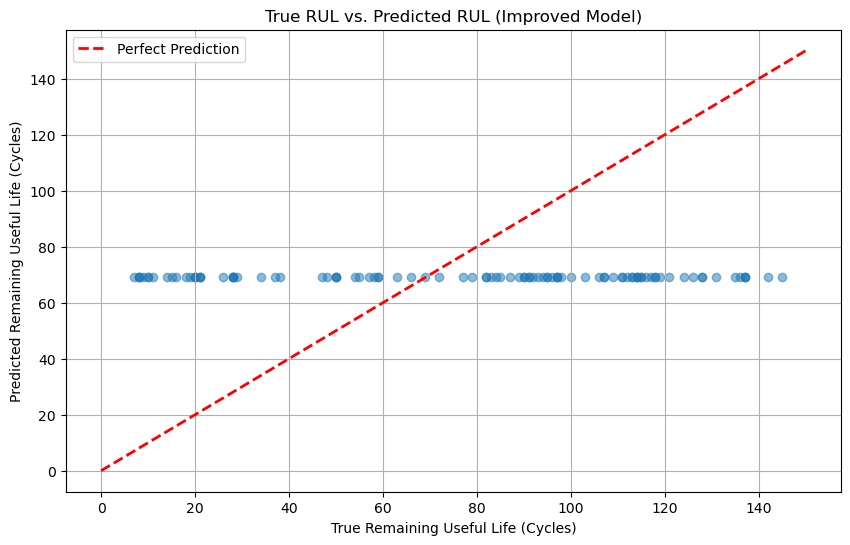

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- File Paths ---
train_path = r'C:\\Users\\SALEEM\\KSA Project\\CMAPSSData\\train_FD001.txt'
test_path = r'C:\\Users\\SALEEM\\KSA Project\\CMAPSSData\\test_FD001.txt'
rul_path = r'C:\\Users\\SALEEM\\KSA Project\\CMAPSSData\\RUL_FD001.txt'
improved_model_path = r'C:\\Users\\SALEEM\\KSA Project\\lstm_rul_predictor_IMPROVED.h5'

# --- DATA PREPARATION ---
# All our previous steps combined into one function for neatness
def prepare_data(path, scaler=None, is_train=True):
    # Load
    df = pd.read_csv(path, sep='\\s+', header=None)
    
    # Clean
    df.drop(columns=[4, 22, 23], inplace=True)
    df.columns = [
        'unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2',
        's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
        's11', 's12', 's13', 's14', 's15', 's16', 's17', 's20', 's21'
    ]
    
    # Feature Engineering (RUL)
    if is_train:
        max_cycles = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
        max_cycles.columns = ['unit_number', 'failure_cycle']
        df = pd.merge(df, max_cycles, on='unit_number', how='left')
        df['RUL'] = df['failure_cycle'] - df['time_in_cycles']
        df.drop(columns=['failure_cycle'], inplace=True)
        
        # *** THE CRUCIAL IMPROVEMENT: CLIPPING THE RUL ***
        df['RUL'] = df['RUL'].clip(upper=125)
        print("--- Applied RUL Clipping at 125 cycles ---")

    # Scale
    features_to_scale = ['op_setting_1', 'op_setting_2', 's1', 's2', 's3', 's4', 's5', 
                         's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 
                         's14', 's15', 's16', 's17', 's20', 's21']
    if is_train:
        scaler = MinMaxScaler()
        df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
        return df, scaler
    else:
        df[features_to_scale] = scaler.transform(df[features_to_scale])
        return df

# Prepare training data and get the scaler
train_df, scaler = prepare_data(train_path, is_train=True)

# Prepare test data using the *same* scaler
test_df = prepare_data(test_path, scaler=scaler, is_train=False)
true_rul = pd.read_csv(rul_path, sep='\\s+', header=None).values.flatten()


# --- CREATE SEQUENCES (Same as before) ---
def create_sequences(df, features, target, sequence_length=50, is_test=False):
    sequences = []
    labels = []
    if is_test:
        for unit in df['unit_number'].unique():
            unit_data = df[df['unit_number'] == unit]
            last_seq_df = unit_data[features].tail(sequence_length)
            if len(last_seq_df) < sequence_length:
                padding = pd.DataFrame(np.zeros((sequence_length - len(last_seq_df), len(features))), columns=features)
                last_seq_df = pd.concat([padding, last_seq_df], ignore_index=True)
            sequences.append(last_seq_df.values)
        return np.array(sequences)
    else:
        for unit in df['unit_number'].unique():
            unit_df = df[df['unit_number'] == unit]
            for i in range(len(unit_df) - sequence_length):
                sequences.append(unit_df[features].iloc[i:i+sequence_length].values)
                labels.append(unit_df[target].iloc[i+sequence_length-1])
        return np.array(sequences), np.array(labels)

features = ['op_setting_1', 'op_setting_2', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 
            's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 
            's20', 's21']
X_train, y_train = create_sequences(train_df, features, 'RUL')
X_test = create_sequences(test_df, features, 'RUL', is_test=True)

print(f"Shapes after creating sequences: X_train:{X_train.shape}, y_train:{y_train.shape}, X_test:{X_test.shape}")


# --- RE-TRAIN AND EVALUATE THE MODEL ---
print("\\n--- Building and Training IMPROVED Model ---")
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)
model.save(improved_model_path)
print(f"\\n--- Improved model saved to {improved_model_path} ---")

# --- Final Evaluation ---
print("\\n--- Evaluating IMPROVED Model ---")
predicted_rul_improved = model.predict(X_test).flatten()
rmse_improved = np.sqrt(np.mean((predicted_rul_improved - true_rul)**2))
print(f"IMPROVED Root Mean Squared Error (RMSE): {rmse_improved:.2f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(true_rul, predicted_rul_improved, alpha=0.5)
plt.plot([0, 150], [0, 150], 'r--', lw=2, label='Perfect Prediction')
plt.title('True RUL vs. Predicted RUL (Improved Model)')
plt.xlabel('True Remaining Useful Life (Cycles)')
plt.ylabel('Predicted Remaining Useful Life (Cycles)')
plt.legend()
plt.grid(True)
plt.savefig('final_evaluation_IMPROVED.png')
print("\\n--- Generated final improved evaluation plot ---") 

--- Loading and Preprocessing Data ---
--- Calculating and Clipping RUL ---
RUL values clipped at 125 cycles.
--- Scaling Sensor and Setting Data ---
--- Creating Sequences for LSTM ---
Shapes after splitting: X_train:(12584, 50, 16), y_train:(12584,), X_val:(3147, 50, 16), y_val:(3147,)

--- Building and Training FINAL Model ---


c:\Users\SALEEM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50, 100)        │        46,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,051 (300.98 KB)

 Trainable params: 77,051 (300.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
197/197 - 23s - 114ms/step - loss: 5727.0107 - val_loss: 4910.6069
Epoch 2/100
197/197 - 14s - 71ms/step - loss: 4502.8789 - val_loss: 3958.7273
Epoch 3/100
197/197 - 13s - 66ms/step - loss: 3660.6208 - val_loss: 3247.4019
Epoch 4/100
197/197 - 15s - 74ms/step - loss: 3028.8582 - val_loss: 2728.2319
Epoch 5/100
197/197 - 13s - 67ms/step - loss: 2576.7954 - val_loss: 2359.5549
Epoch 6/100
197/197 - 14s - 69ms/step - loss: 2258.0881 - val_loss: 2107.8738
Epoch 7/100
197/197 - 14s - 71ms/step - loss: 2041.1910 - val_loss: 1944.6523
Epoch 8/100
197/197 - 14s - 73ms/step - loss: 1907.8290 - val_loss: 1844.8735
Epoch 9/100
197/197 - 14s - 73ms/step - loss: 1822.9380 - val_loss: 1788.4547
Epoch 10/100
197/197 - 14s - 72ms/step - loss: 1785.0060 - val_loss: 1759.1862
Epoch 11/100
197/197 - 15s - 77ms/step - loss: 1759.1207 - val_loss: 1745.2893
Epoch 12/100
197/197 - 15s - 76ms/step - loss: 1741.0927 - val_loss: 1739.5106
Epoch 13/100
197/197 - 12s - 63ms/step - loss: 1742.7030 - v


--- Final model saved to C:/Users/SALEEM/KSA Project/lstm_rul_predictor_FINAL.h5 ---

--- Evaluating FINAL Model ---
FINAL Root Mean Squared Error (RMSE) on Validation Set: 10.96


99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step
--- Generated final evaluation plot: C:/Users/SALEEM/KSA Project/final_evaluation_plot.png ---


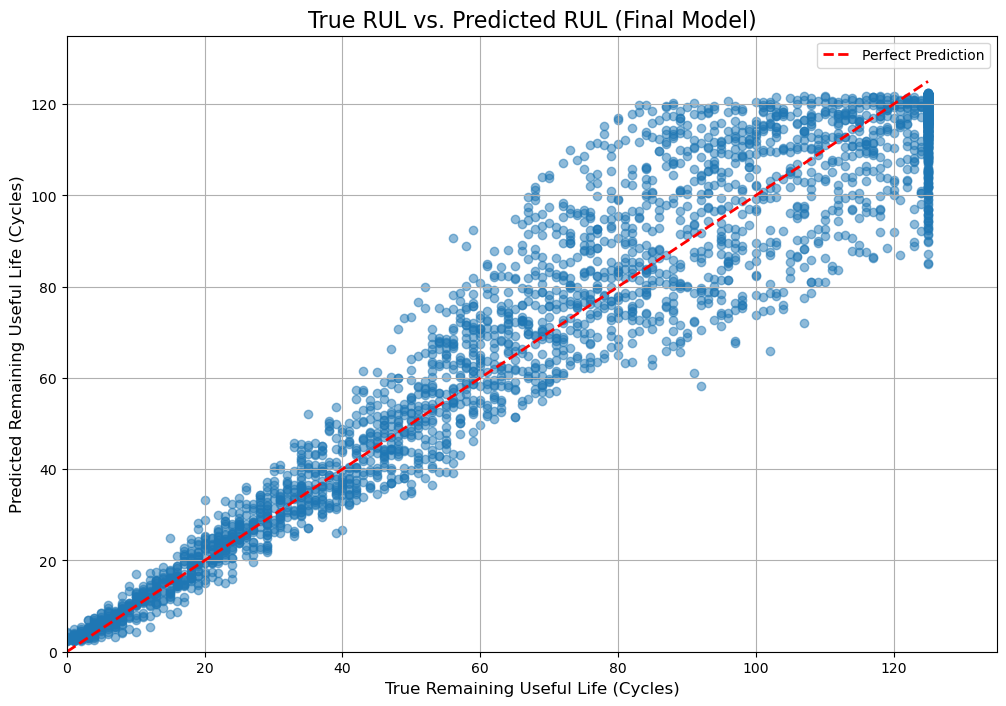


--- Project Complete ---
This final model and plot represent the culmination of the project.
The RMSE is a quantitative measure of performance, and the plot gives a qualitative view.
You can now include these artifacts in your portfolio and discuss the iterative process you followed.


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os

# --- Step 1: Configuration & Setup ---
# PLEASE UPDATE THESE PATHS
TRAIN_DATA_PATH = "C:/Users/SALEEM/KSA Project/CMAPSSData/train_FD001.txt"
OUTPUT_DIR = "C:/Users/SALEEM/KSA Project/"

# Create output directory if it doesn't exist
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# Constants
SEQUENCE_LENGTH = 50
RUL_CLIP_THRESHOLD = 125

# --- Step 2: Load and Preprocess Data ---
print("--- Loading and Preprocessing Data ---")
# Define column names based on the dataset documentation
column_names = ['unit_id', 'time_in_cycles'] + [f'setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
# Load the training data
train_df = pd.read_csv(TRAIN_DATA_PATH, sep='\\s+', header=None, names=column_names)

# Drop constant columns identified in EDA
constant_columns = ['setting_3'] + [f'sensor_{i}' for i in [1, 5, 6, 10, 16, 18, 19]]
train_df = train_df.drop(columns=constant_columns)

# --- Step 3: Feature Engineering (RUL Calculation) ---
print("--- Calculating and Clipping RUL ---")
# Get the maximum cycle for each unit
max_cycles = train_df.groupby('unit_id')['time_in_cycles'].max().reset_index()
max_cycles.columns = ['unit_id', 'max_cycle']
# Merge max_cycle back into the training data
train_df = pd.merge(train_df, max_cycles, on='unit_id', how='left')
# Calculate RUL
train_df['RUL'] = train_df['max_cycle'] - train_df['time_in_cycles']
# Drop the max_cycle column as it's no longer needed
train_df = train_df.drop(columns=['max_cycle'])

# Clip the RUL values
train_df['RUL'] = train_df['RUL'].clip(upper=RUL_CLIP_THRESHOLD)
print(f"RUL values clipped at {RUL_CLIP_THRESHOLD} cycles.")

# --- Step 4: Scaling ---
print("--- Scaling Sensor and Setting Data ---")
# Identify feature columns (settings and sensors)
feature_cols = [col for col in train_df.columns if col.startswith('setting') or col.startswith('sensor')]
scaler = MinMaxScaler()
train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])

# --- Step 5: Sequence Creation ---
def create_sequences(df, sequence_length):
    sequences = []
    labels = []
    for unit_id in df['unit_id'].unique():
        unit_data = df[df['unit_id'] == unit_id]
        # Get feature data and RUL data
        feature_data = unit_data[feature_cols].values
        rul_data = unit_data['RUL'].values
        for i in range(len(unit_data) - sequence_length + 1):
            sequences.append(feature_data[i:i+sequence_length])
            labels.append(rul_data[i+sequence_length-1])
    return np.array(sequences), np.array(labels)

print("--- Creating Sequences for LSTM ---")
X, y = create_sequences(train_df, SEQUENCE_LENGTH)

# --- Step 6: Data Splitting ---
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shapes after splitting: X_train:{X_train.shape}, y_train:{y_train.shape}, X_val:{X_val.shape}, y_val:{y_val.shape}")

# --- Step 7: Build and Train Final LSTM Model ---
print("\n--- Building and Training FINAL Model ---")
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(SEQUENCE_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Define the EarlyStopping callback
# This will stop training when the validation loss has not improved for 10 epochs.
# It will also restore the weights from the best epoch.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# Train the model for a larger number of epochs
history = model.fit(
    X_train, y_train,
    epochs=100,  # Train for up to 100 epochs
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping], # Use the early stopping callback
    verbose=2
)

# --- Step 8: Save Final Model ---
FINAL_MODEL_PATH = os.path.join(OUTPUT_DIR, 'lstm_rul_predictor_FINAL.h5')
model.save(FINAL_MODEL_PATH)
print(f"\n--- Final model saved to {FINAL_MODEL_PATH} ---")


# --- Step 9: Final Evaluation ---
print("\n--- Evaluating FINAL Model ---")
# Evaluate the model on the validation set
loss = model.evaluate(X_val, y_val, verbose=0)
rmse = np.sqrt(loss)
print(f"FINAL Root Mean Squared Error (RMSE) on Validation Set: {rmse:.2f}")

# Generate predictions for the evaluation plot
y_pred = model.predict(X_val)

# --- Step 10: Plotting Results ---
plt.figure(figsize=(12, 8))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([0, RUL_CLIP_THRESHOLD], [0, RUL_CLIP_THRESHOLD], 'r--', lw=2, label='Perfect Prediction')
plt.title('True RUL vs. Predicted RUL (Final Model)', fontsize=16)
plt.xlabel('True Remaining Useful Life (Cycles)', fontsize=12)
plt.ylabel('Predicted Remaining Useful Life (Cycles)', fontsize=12)
plt.grid(True)
plt.legend()
plt.xlim(0, RUL_CLIP_THRESHOLD + 10)
plt.ylim(0, RUL_CLIP_THRESHOLD + 10)

# Save the plot
FINAL_PLOT_PATH = os.path.join(OUTPUT_DIR, 'final_evaluation_plot.png')
plt.savefig(FINAL_PLOT_PATH)
print(f"--- Generated final evaluation plot: {FINAL_PLOT_PATH} ---")
plt.show()

print("\n--- Project Complete ---")
print("This final model and plot represent the culmination of the project.")
print("The RMSE is a quantitative measure of performance, and the plot gives a qualitative view.")
print("You can now include these artifacts in your portfolio and discuss the iterative process you followed.") 

In [24]:
pip install streamlit plotly